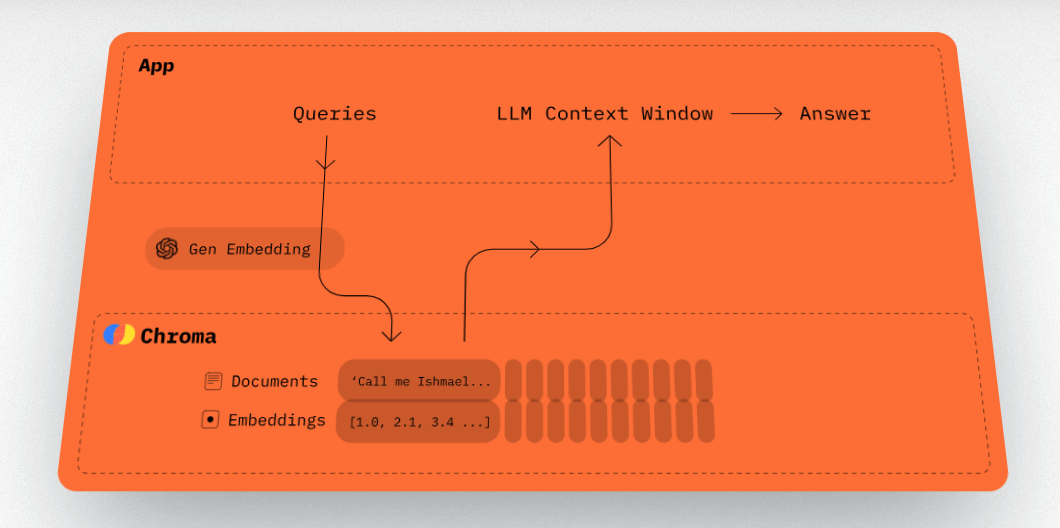

In [1]:
!pip install -q  langchain-openai==0.1.8 langchain_community==0.2.4 tiktoken==0.7.0 langchain==0.2.3
!pip install -q  faiss-cpu==1.8.0 Chromadb==0.4.24
!pip install -q  html2text "unstructured[all-docs]" pdfplumber


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 24.9 MB/s eta 0:00:00


In [5]:
from langchain.vectorstores import FAISS
from langchain.vectorstores import Chroma

In [6]:
texts = [
    """حضور امیرکبیر در دربار ناصرالدین‌شاه همواره مورد مخالفت تعدادی از نزدیکان شاه از جمله مهد علیا،
     مادر شاه و اعتمادالدوله (میرزا آقاخان نوری) قرار داشت؛
    چنان‌که تلاش‌های این عده سرانجام منجر به صدور حکم عزل امیرکبیر از مقام خود شد
    . برخی از درباریان که او را مخالف منافع خود می‌دیدند، تهمت زدند که امیرکبیر داعیه سلطنت دارد.""",

    """روز ۳۰ آبان، فردای دستگیری، امیرکبیر از تمامی مناصب خلع شد و دو روز بعد به عنوان یک زندانی به کاشان فرستاده شد.
     این تبعید ۴۰ روز به طول انجامید.
     به نگهبانان دستور داده شده بود که با کمال احترام با او رفتار کنند.
     با این حال همسر وزیر مختار انگلیس که خارج از شهر با کاروان حامل امیر برخورد داشته
      می‌نویسد که سرنوشت او را به راحتی می‌شد حدس زد""",
    """ به روایت میرزا محمد جعفر خان حقایق نگار خورموجی در کتاب مشهور حقایق‌الخبار ناصری
     روز بعد از قتل جسدش را در گورستان پشت مشهد کاشان (در نزدیکی امامزاده حبیب بن موسی) به خاک سپردند.
      اما چند ماه بعد، به اصرار همسرش عزت‌الدوله کالبدش را به کربلا منتقل کردند
       و در اتاقی که در آن به سوی حرم امام حسین باز می‌شد به خاک سپردند.""",
        """ به روایت میرزا محمد جعفر خان حقایق نگار خورموجی در کتاب مشهور حقایق‌الخبار ناصری
     روز بعد از قتل جسدش را در گورستان پشت مشهد کاشان (در نزدیکی امامزاده حبیب بن موسی) به خاک سپردند.
      اما چند ماه بعد، به اصرار همسرش عزت‌الدوله کالبدش را به کربلا منتقل کردند
       و در اتاقی که در آن به سوی حرم امام حسین باز می‌شد به خاک سپردند.""",

]

In [7]:
from google.colab import userdata
openai_api_key = userdata.get('openai_api_key')

In [8]:
# from langchain.embeddings.openai import OpenAIEmbeddings
from langchain_openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings(openai_api_key=openai_api_key)


In [9]:
db = FAISS.from_texts(texts, embedding)

In [10]:
db.similarity_search('مهدعلیا', k=1)

[Document(page_content='حضور امیرکبیر در دربار ناصرالدین\u200cشاه همواره مورد مخالفت تعدادی از نزدیکان شاه از جمله مهد علیا،\n     مادر شاه و اعتمادالدوله (میرزا آقاخان نوری) قرار داشت؛\n    چنان\u200cکه تلاش\u200cهای این عده سرانجام منجر به صدور حکم عزل امیرکبیر از مقام خود شد\n    . برخی از درباریان که او را مخالف منافع خود می\u200cدیدند، تهمت زدند که امیرکبیر داعیه سلطنت دارد.')]

In [11]:
db.similarity_search_with_relevance_scores('مهدعلیا', k=2)

[(Document(page_content='حضور امیرکبیر در دربار ناصرالدین\u200cشاه همواره مورد مخالفت تعدادی از نزدیکان شاه از جمله مهد علیا،\n     مادر شاه و اعتمادالدوله (میرزا آقاخان نوری) قرار داشت؛\n    چنان\u200cکه تلاش\u200cهای این عده سرانجام منجر به صدور حکم عزل امیرکبیر از مقام خود شد\n    . برخی از درباریان که او را مخالف منافع خود می\u200cدیدند، تهمت زدند که امیرکبیر داعیه سلطنت دارد.'),
  0.745053966238693),
 (Document(page_content=' به روایت میرزا محمد جعفر خان حقایق نگار خورموجی در کتاب مشهور حقایق\u200cالخبار ناصری\n     روز بعد از قتل جسدش را در گورستان پشت مشهد کاشان (در نزدیکی امامزاده حبیب بن موسی) به خاک سپردند.\n      اما چند ماه بعد، به اصرار همسرش عزت\u200cالدوله کالبدش را به کربلا منتقل کردند\n       و در اتاقی که در آن به سوی حرم امام حسین باز می\u200cشد به خاک سپردند.'),
  0.7273212065633408)]

In [12]:
url = 'https://fa.wikipedia.org/wiki/%D8%A7%D9%85%DB%8C%D8%B1%DA%A9%D8%A8%DB%8C%D8%B1'
url = 'https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird'
from langchain.document_loaders import AsyncHtmlLoader

# urls = ["https://dent.umich.edu/education/internationally-trained-dentist-program-itdp"]
loader = AsyncHtmlLoader(url)
docs = loader.load()

Fetching pages: 100%|##########| 1/1 [00:00<00:00,  1.15it/s]


In [13]:
from langchain_community.document_transformers import Html2TextTransformer

html2text = Html2TextTransformer()
docs_transformed = html2text.transform_documents(docs)
docs_transformed[0].page_content

' __\n\n  * Home\n  * My Books\n  * Browse ▾\n\n    * Recommendations\n    * Choice Awards\n    * Genres\n    * Giveaways\n    * New Releases\n    * Lists\n    * Explore\n    * News & Interviews\n\n### Loading...\n\n__\n\n  * Community ▾\n\n    * Groups\n    * Quotes\n    * Ask the Author\n    * People\n\n __\n\n  * Sign in\n  * Join\n\nJump to ratings and reviews\n\nWant to read\n\n __\n\nShop this series __\n\n__\n\nRate this book\n\n __\n\n### To Kill a Mockingbird #1\n\n# To Kill a Mockingbird\n\n __\n\n###\n\nHarper Lee\n\n4.26\n\n6,189,580 ratings118,679 reviews\n\nWant to read\n\n __\n\nShop this series __\n\n__\n\nRate this book\n\nThe unforgettable novel of a childhood in a sleepy Southern town and the\ncrisis of conscience that rocked it. "To Kill A Mockingbird" became both an\ninstant bestseller and a critical success when it was first published in 1960.\nIt went on to win the Pulitzer Prize in 1961 and was later made into an\nAcademy Award-winning film, also a classic.  \n 

In [14]:
len(docs_transformed[0].page_content)

100804

In [15]:
docs_transformed[0].metadata

{'source': 'https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird',
 'title': 'To Kill a Mockingbird by Harper Lee | Goodreads',
 'description': 'Read 119k reviews from the world’s largest community \n    for readers. The unforgettable novel of a childhood in a sleepy Southern town and the crisis of consci…',
 'language': 'en'}

In [16]:
from langchain.docstore.document import Document

doc_example =  Document(page_content="text", metadata={"source": "local"})

In [17]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import Docx2txtLoader
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
text_chunks = text_splitter.split_documents(docs_transformed)

In [18]:
len(docs[0].page_content)

761447

In [19]:
for chunk in text_chunks:
  print(len(chunk.page_content))
  if len(chunk.page_content)>1000:
    print(chunk.page_content)
    break



575
984
148
976
940
71
503
989
931
172
994
28
968
992
948
946
997
83
325
962
964
386
987
993
552
968
754
892
969
964
969
531
79
941
993
639
984
827
983
991
983
969
985
983
962
986
116
150
991
926
988
967
981
121
830
963
55
113
939
950
991
993
972
964
978
931
960
939
993
990
967
952
988
923
923
136
844
418
929
103
842
941
769
985
989
634
150
938
953
980
43
802
972
940
952
915
997
861
605
983
995
218
989
200
952
943
965
963
462
994
996
967
999
931
996
990
83
981
974
963
924
634
996
979
59
977
935
568


In [20]:
text_chunks[0]

Document(page_content='__\n\n  * Home\n  * My Books\n  * Browse ▾\n\n    * Recommendations\n    * Choice Awards\n    * Genres\n    * Giveaways\n    * New Releases\n    * Lists\n    * Explore\n    * News & Interviews\n\n### Loading...\n\n__\n\n  * Community ▾\n\n    * Groups\n    * Quotes\n    * Ask the Author\n    * People\n\n __\n\n  * Sign in\n  * Join\n\nJump to ratings and reviews\n\nWant to read\n\n __\n\nShop this series __\n\n__\n\nRate this book\n\n __\n\n### To Kill a Mockingbird #1\n\n# To Kill a Mockingbird\n\n __\n\n###\n\nHarper Lee\n\n4.26\n\n6,189,580 ratings118,679 reviews\n\nWant to read\n\n __\n\nShop this series __\n\n__\n\nRate this book', metadata={'source': 'https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird', 'title': 'To Kill a Mockingbird by Harper Lee | Goodreads', 'description': 'Read 119k reviews from the world’s largest community \n    for readers. The unforgettable novel of a childhood in a sleepy Southern town and the crisis of consci…', 'lang

In [21]:
db.add_documents(text_chunks)

['f8d9790b-fdb4-448a-b73d-d32e5c4247b9',
 'cc5579a7-fd02-4ae4-ad1f-cc846ade98f6',
 '0e8484f8-e76b-4b6c-a435-f69a674f2179',
 '0732adf1-fbb6-40db-9f1e-2d4583b85224',
 '48efa644-d916-4b2e-8c1e-4939d93fc585',
 'a38b5e70-c6cb-46de-a54a-03d91a236c96',
 '31033938-9311-4322-80b7-5150e0032765',
 '85a6f48b-d4e3-4618-83a4-c3d02f39117e',
 'e13f6d29-40c8-4c7c-9b9e-41d0e4780784',
 '8752dbac-93be-475e-b02a-cb7a46354016',
 '56b10e16-9420-45fa-8d1e-ca6654310965',
 'ecc4f834-e4e4-42df-923f-36d7d9af265f',
 '62741ee8-93ec-45ed-80b0-d85964b53309',
 'cb76dfb4-4181-4347-bee9-304f85e25be1',
 'd77a919b-f0e0-4c87-b96b-604cbac574f5',
 '5c4ea157-ad9b-45d1-bc02-1aa934b99ccc',
 '073a650b-d173-45e3-824a-a1948ca2307f',
 '2e1a5a55-4cda-4b3a-9199-f08e56075b26',
 'b5ea11c5-f1ed-43b2-81c1-70783aea2340',
 '3a1ce2d0-69d3-4405-8d9a-dfb5a8659e45',
 'df2ecab4-3d1e-405d-9954-7b4093dc8567',
 '1f12d692-b96d-4629-b5f4-b69243ddb8c7',
 '69712078-d8c2-4068-b603-fe9f680fb629',
 'd0481c13-a3b5-4a76-9d13-672c115fa19f',
 '5ecac26d-e10b-

In [22]:
dir(db)

['_FAISS__add',
 '_FAISS__from',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_aembed_documents',
 '_aembed_query',
 '_asimilarity_search_with_relevance_scores',
 '_cosine_relevance_score_fn',
 '_create_filter_func',
 '_embed_documents',
 '_embed_query',
 '_euclidean_relevance_score_fn',
 '_get_retriever_tags',
 '_max_inner_product_relevance_score_fn',
 '_normalize_L2',
 '_select_relevance_score_fn',
 '_similarity_search_with_relevance_scores',
 'aadd_documents',
 'aadd_texts',
 'add_documents',
 'add_embeddings',
 'add_texts',
 'adelete',
 'afrom_documents',
 'afrom_embeddings',
 'afrom_texts',
 'amax_marginal_re

In [23]:
db.search('مهد علیا', search_type='mmr', k=1)

[Document(page_content='حضور امیرکبیر در دربار ناصرالدین\u200cشاه همواره مورد مخالفت تعدادی از نزدیکان شاه از جمله مهد علیا،\n     مادر شاه و اعتمادالدوله (میرزا آقاخان نوری) قرار داشت؛\n    چنان\u200cکه تلاش\u200cهای این عده سرانجام منجر به صدور حکم عزل امیرکبیر از مقام خود شد\n    . برخی از درباریان که او را مخالف منافع خود می\u200cدیدند، تهمت زدند که امیرکبیر داعیه سلطنت دارد.')]

In [24]:
len(db.embeddings.embed_query(texts[0]))

1536

In [25]:
vs = Chroma.from_documents(text_chunks, embedding)

In [26]:
len(vs.get()['documents'])

128

In [27]:
len(text_chunks)

128

In [28]:
vs.get()['ids']

['024a3d8c-5e92-46ec-8b1d-5542ba0b83be',
 '02c707b5-81ce-4d73-a09a-38a04ef5b966',
 '0820ff81-63b4-400b-861c-468fec4c3b4b',
 '08a9c812-47d3-48d4-803d-5a1bd1930a2a',
 '097e512c-8b38-41b5-a9a3-072595d43369',
 '0c5b35cc-01a4-4ee2-b916-02d300d653e7',
 '0d928c71-24e6-4a52-a93f-b4134f33e118',
 '0ecd2b41-14af-4a1c-8c51-9764bb84236d',
 '0fbf5e54-c8f3-4a9d-abb5-4394546a215d',
 '13bd10d6-08ce-4e0d-840f-3cfa2963782c',
 '13dfe4f3-6a5c-4838-819a-f49dc0c9e1c6',
 '17d07f8e-899e-4924-93cd-c4e98da30573',
 '17de7bfb-f411-45b7-9bb8-c1ad7d05f5fd',
 '19150678-0194-4e21-a8c1-a78b726ed7fd',
 '194873da-7168-46bd-8586-e13ea8451929',
 '1d69bb01-786f-43e7-9eb8-05ee738ba803',
 '1d726a57-5c43-47a7-802a-b829fbf1e577',
 '1fcfd2d5-b238-477d-ab43-072deba2f40e',
 '20afaf67-5a25-4524-8d69-14146b22476d',
 '233ad26f-1030-4dc3-8738-79a9362a6803',
 '23a28e47-1030-496c-ac6a-f7207f340862',
 '2931adc5-eec4-4e3c-81d5-55d805561629',
 '2a4dc36b-844c-4c9c-a0a1-b188c7f2600d',
 '2b9499fa-969c-40aa-b0e6-eba7dbde862b',
 '2f27ad44-3f91-

In [30]:
# vs.embeddings.embed_query(
ids = vs.get()['ids']
(vs.embeddings.embed_query(vs.get(ids[0])['documents'][0])
)

[-0.0016492536524310708,
 0.0036918760742992163,
 -0.0070772310718894005,
 -0.014222578145563602,
 0.005524191074073315,
 0.04043353721499443,
 -0.01184533629566431,
 -0.01787358522415161,
 -0.013439246453344822,
 -0.034057896584272385,
 0.0023363716900348663,
 0.006903535686433315,
 -0.012628667987883091,
 -0.006968245841562748,
 0.006532304920256138,
 0.009379545226693153,
 0.029180806130170822,
 0.0007177701918408275,
 -0.0013197435764595866,
 -0.02363618090748787,
 -0.018364017829298973,
 0.010224181227385998,
 -0.02314574643969536,
 -0.037599917501211166,
 -0.009938094764947891,
 -0.0016211558831855655,
 0.03879875689744949,
 -0.03522948920726776,
 0.0054083941504359245,
 -0.032286886125802994,
 -0.001393819460645318,
 -0.008160272613167763,
 -0.03171471506357193,
 -0.02212400920689106,
 -0.042694978415966034,
 0.017110686749219894,
 -0.009195632301270962,
 -0.024371830746531487,
 0.03435760736465454,
 -0.015094459988176823,
 0.018990684300661087,
 -0.010312731377780437,
 -0.02250

In [31]:
db.save_local('/content/faiss_example')

In [33]:
db_2 = FAISS.load_local('/content/faiss_example', embedding, allow_dangerous_deserialization=True)

In [34]:
db_2.similarity_search('مهد علیا', k=1)

[Document(page_content='حضور امیرکبیر در دربار ناصرالدین\u200cشاه همواره مورد مخالفت تعدادی از نزدیکان شاه از جمله مهد علیا،\n     مادر شاه و اعتمادالدوله (میرزا آقاخان نوری) قرار داشت؛\n    چنان\u200cکه تلاش\u200cهای این عده سرانجام منجر به صدور حکم عزل امیرکبیر از مقام خود شد\n    . برخی از درباریان که او را مخالف منافع خود می\u200cدیدند، تهمت زدند که امیرکبیر داعیه سلطنت دارد.')]

In [35]:
from langchain_community.document_loaders import UnstructuredFileLoader

loader = UnstructuredFileLoader("/content/attention.pdf")
docs = loader.load()




PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

In [36]:
docs[0].page_content

'<!DOCTYPE html><html lang="en"><head><script>var ue_t0=window.ue_t0||+new Date();(function(e){var c=e,a={main_scope:"mainscopecsm",q:[],t0:c.ue_t0||+new Date(),d:g};function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:arguments,t:a.d()})}}function b(k,j,h){var i={m:k,f:j,l:h,fromOnError:1,args:arguments};c.ueLogError(i);return false}b.skipTrace=1;e.onerror=b;function f(){c.uex("ld")}if(e.addEventListener){e.addEventListener("load",f,false)}else{if(e.attachEvent){e.attachEvent("onload",f)}}a.tag=d("tag");a.log=d("log");a.reset=d("rst");c.ue_csm=c;c.ue=a;c.ueLogError=d("err");c.ues=d("ues");c.uet=d("uet");c.uex=d("uex");c.uet("ue")})(window);(function(e,d){var a=e.ue||{};function c(g){if(!g){return}var f=d.head||d.getElementsByTagName("head")[0]||d.documentElement,h=d.createElement("script");h.async="async";h.src=g;f.insertBefore(h,f.firstChild)}function b(){var k=e.ue_cdn||"z-ecx.images-amazon.com",g=e.ue_cdns||"images-na.ssl-images-amazon.com",j=

In [ ]:
docs[0].metadata

{'source': '/content/attention.pdf'}

In [ ]:
loader = UnstructuredFileLoader(
   "/content/attention.pdf", mode="elements"
)
docs = loader.load()


{'source': '/content/attention.pdf',
 'coordinates': {'points': ((107.532, 202.90011719999995),
   (107.532, 227.6919216),
   (302.96132786, 227.6919216),
   (302.96132786, 202.90011719999995)),
  'system': 'PixelSpace',
  'layout_width': 612,
  'layout_height': 792},
 'file_directory': '/content',
 'filename': 'attention.pdf',
 'languages': ['eng'],
 'last_modified': '2024-02-10T10:44:01',
 'page_number': 5,
 'parent_id': '254bce889c65e7d964e2106a5b2640f9',
 'filetype': 'application/pdf',
 'category': 'NarrativeText'}

In [ ]:
docs[100]

Document(page_content='where pos is the position and i is the dimension. That is, each dimension of the positional encoding corresponds to a sinusoid. The wavelengths form a geometric progression from 2π to 10000 · 2π. We chose this function because we hypothesized it would allow the model to easily learn to attend by relative positions, since for any fixed offset k, P Epos+k can be represented as a linear function of P Epos.', metadata={'source': '/content/attention.pdf', 'coordinates': {'points': ((107.641, 377.0471444), (107.641, 431.55991720000003), (504.3427135559997, 431.55991720000003), (504.3427135559997, 377.0471444)), 'system': 'PixelSpace', 'layout_width': 612, 'layout_height': 792}, 'file_directory': '/content', 'filename': 'attention.pdf', 'languages': ['eng'], 'last_modified': '2024-02-09T20:09:19', 'page_number': 6, 'parent_id': 'e1dfdc6a93a6e12427797bcd880aefe6', 'filetype': 'application/pdf', 'category': 'NarrativeText'})

In [ ]:
vs = FAISS.from_documents(docs, embedding)

In [ ]:
vs.similarity_search('decoder stack layer', k=2)

[Document(page_content='3.1 Encoder and Decoder Stacks', metadata={'source': '/content/attention.pdf', 'coordinates': {'points': ((108.0, 482.7575834), (108.0, 492.7201834), (253.00564300000005, 492.7201834), (253.00564300000005, 482.7575834)), 'system': 'PixelSpace', 'layout_width': 612, 'layout_height': 792}, 'file_directory': '/content', 'filename': 'attention.pdf', 'languages': ['eng'], 'last_modified': '2024-02-10T10:44:01', 'page_number': 3, 'filetype': 'application/pdf', 'category': 'Title'}),
 Document(page_content='Decoder: The decoder is also composed of a stack of N = 6 identical layers. In addition to the two sub-layers in each encoder layer, the decoder inserts a third sub-layer, which performs multi-head attention over the output of the encoder stack. Similar to the encoder, we employ residual connections around each of the sub-layers, followed by layer normalization. We also modify the self-attention sub-layer in the decoder stack to prevent positions from attending to s

In [ ]:
from langchain.document_loaders import PDFPlumberLoader

loader = PDFPlumberLoader( "/content/attention.pdf")
docs = loader.load()

In [ ]:
len(docs)

15